### 2. Aspectos más relevantes encontrados en el dataset de hurto a comercio y viviendas

In [1]:
##Importar las librerías requeridas para el análisis
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
##Definir tamaño máximo de filas a mostrar
pd.set_option('display.max_rows', 100)

In [3]:
##Importar el dataset del CSV
df = pd.read_csv('../data/hurto_comercioV2.csv', low_memory = False)

In [4]:
##Visualizar los primeros datos
df.head()

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,TIPO DE HURTO,CANTIDAD
0,CAQUETÁ,SAN VICENTE DEL CAGUÁN,18753,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,HURTO RESIDENCIAS,1
1,CAUCA,POPAYÁN,19001,ARMA BLANCA / CORTOPUNZANTE,1/01/2010,FEMENINO,ADULTOS,HURTO RESIDENCIAS,2
2,HUILA,PITALITO,41551,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HURTO RESIDENCIAS,1
3,VALLE,JAMUNDÍ,76364,ARMA DE FUEGO,1/01/2010,MASCULINO,ADULTOS,HURTO RESIDENCIAS,1
4,AMAZONAS,LETICIA,91001,CONTUNDENTES,1/01/2010,MASCULINO,ADULTOS,HURTO RESIDENCIAS,1


# Top 3

# Arma o medio más común

[Text(0, 0, '220069'),
 Text(0, 0, '127567'),
 Text(0, 0, '58902'),
 Text(0, 0, '45093'),
 Text(0, 0, '13417'),
 Text(0, 0, '11881'),
 Text(0, 0, '8383'),
 Text(0, 0, '5058'),
 Text(0, 0, '2285'),
 Text(0, 0, '283'),
 Text(0, 0, '24'),
 Text(0, 0, '1')]

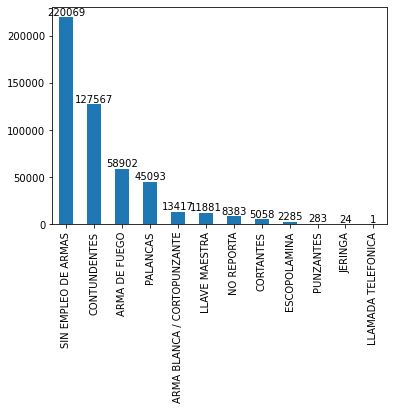

In [5]:
armas_medios=df['ARMAS MEDIOS'].value_counts()
armas_medios.sort_values(ascending=False,inplace=True)
graph = armas_medios.plot.bar()
graph.bar_label(graph.containers[0])

Para el caso de accidentes de tránsito y lesiones personales el medio más común en el que ocurren estos hechos es en vehículos

# Proporción por genéro y grupo etario

# Tendencia por mes del año

In [6]:
plt.figure(figsize = (15, 8))
# Convertir a formato de fecha
df['FECHA HECHO']=pd.to_datetime(df['FECHA HECHO'],format='%d/%m/%Y')
# Contar la cantidad de hechos agrupando por mes
count_month=df.groupby(df['FECHA HECHO'].dt.month_name().str[:3]).agg('count')['CANTIDAD']
# Ver el total de los datos
count_month.sum()

492963

<Figure size 1080x576 with 0 Axes>

In [7]:
#Calcular la desviación estándar de los datos
count_month.std()

3336.7297034126636

<AxesSubplot:xlabel='FECHA HECHO'>

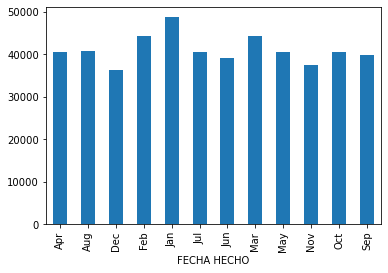

In [8]:
# Graficar
count_month.plot(kind='bar')

# Descripciones o modalidades más comunes

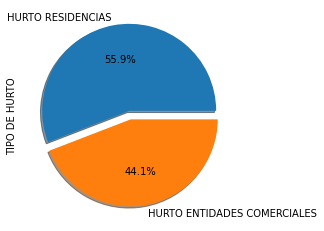

In [9]:
tipo=df['TIPO DE HURTO'].value_counts()
tipo.sort_values(ascending=False,inplace=True)
graph = tipo.plot(kind="pie", autopct='%1.1f%%',shadow=True, explode=[0.05, 0.05])